# Sieci neuronowe dla klasyfikacji

Do przygotowania poniższych programów wykorzystano następujące dataset'y:

- [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
- [cifar10 dataset](https://www.tensorflow.org/datasets/catalog/cifar10) - klasyfikacja trzech zwierząt (kota, żaby oraz konia)
- [fashion mnist (Zalando)](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

Implementacja:

- Sylwester Kąkol
- Adam Jurkiewicz

## Banknotes Authentication

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix


Classifying banknotes as real or fake.


In [34]:
print("<----->\nBanknote\n<----->")
banknote_data = pd.read_csv('banknotes.csv', names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'])
b_train_dataset = banknote_data.sample(frac=0.8, random_state=200)
b_test_dataset = banknote_data.drop(b_train_dataset.index)

b_train_data = b_train_dataset.copy()
b_train_label = b_train_data.pop('Class')
b_train_label = np.array(b_train_label)

b_test_data = b_test_dataset.copy()
b_test_label = b_test_data.pop('Class')
b_test_label = np.array(b_test_label)

<----->
Banknote
<----->


In [35]:
banknote_model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(1)
                                      ])
banknote_model.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics=['accuracy']
                       )
banknote_model.fit(b_train_data, b_train_label, epochs=5)

Epoch 1/5


2022-12-14 21:05:06.659439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 12ms/step - loss: 5.7459 - accuracy: 0.1931
Epoch 2/5
35/35 [==============================] - 0s 5ms/step - loss: 2.7268 - accuracy: 0.2313
Epoch 3/5
35/35 [==============================] - 0s 5ms/step - loss: 1.5102 - accuracy: 0.2495
Epoch 4/5
35/35 [==============================] - 0s 5ms/step - loss: 0.9129 - accuracy: 0.3288
Epoch 5/5
35/35 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.4399


## CIFAR10


Classifying 3 different animals.


In [36]:
print("<----->\nCifar10 Selected Animals\n<----->")
cifar10_data = tf.keras.datasets.cifar10
(c_train_data, c_train_label), (c_test_data, c_test_label) = cifar10_data.load_data()
c_train_data = c_train_data / 255.0
c_test_data = c_test_data / 255.0

<----->
Cifar10 Selected Animals
<----->


In [37]:
train_cat_index = np.where(c_train_label.reshape(-1) == 3)
train_cat_data = c_train_data[train_cat_index]
train_cat_label = c_train_label[train_cat_index]

In [38]:
train_frog_index = np.where(c_train_label.reshape(-1) == 6)
train_frog_data = c_train_data[train_frog_index]
train_frog_label = c_train_label[train_frog_index]

In [39]:
train_horse_index = np.where(c_train_label.reshape(-1) == 7)
train_horse_data = c_train_data[train_horse_index]
train_horse_label = c_train_label[train_horse_index]

In [40]:
cifar3_train_data = np.concatenate((train_cat_data, train_frog_data, train_horse_data))
cifar3_train_label = np.concatenate((train_cat_label, train_frog_label, train_horse_label)).reshape(-1, 1)
cifar3_train_label[cifar3_train_label == 3] = 0
cifar3_train_label[cifar3_train_label == 6] = 1
cifar3_train_label[cifar3_train_label == 7] = 2

In [41]:
test_cat_index = np.where(c_test_label.reshape(-1) == 3)
test_cat_data = c_test_data[test_cat_index]
test_cat_label = c_test_label[test_cat_index]

test_frog_index = np.where(c_test_label.reshape(-1) == 6)
test_frog_data = c_test_data[test_frog_index]
test_frog_label = c_test_label[test_frog_index]

test_horse_index = np.where(c_test_label.reshape(-1) == 7)
test_horse_data = c_test_data[test_horse_index]
test_horse_label = c_test_label[test_horse_index]

cifar3_test_data = np.concatenate((test_cat_data, test_frog_data, test_horse_data))
cifar3_test_label = np.concatenate((test_cat_label, test_frog_label, test_horse_label)).reshape(-1, 1)
cifar3_test_label[cifar3_test_label == 3] = 0
cifar3_test_label[cifar3_test_label == 6] = 1
cifar3_test_label[cifar3_test_label == 7] = 2

cifar3_model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
     ])
cifar3_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy']
                     )
cifar3_model.fit(cifar3_train_data, cifar3_train_label, epochs=10)

Epoch 1/10
  1/469 [..............................] - ETA: 2:18 - loss: 1.0930 - accuracy: 0.4062

2022-12-14 21:05:10.479060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 9ms/step - loss: 0.7608 - accuracy: 0.6561
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5427 - accuracy: 0.7724
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4720 - accuracy: 0.8068
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4315 - accuracy: 0.8262
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3945 - accuracy: 0.8425
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3672 - accuracy: 0.8555
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3562 - accuracy: 0.8595
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3257 - accuracy: 0.8727
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3090 - accuracy: 0.8769
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2905 - accuracy: 0.8835


## Fashion MNIST


Classifying 10 different types of clothes.


In [42]:
print("<----->\nFashion Mnist\n<----->")
fashion_data = tf.keras.datasets.fashion_mnist
(f_train_data, f_train_label), (f_test_data, f_test_label) = fashion_data.load_data()
f_train_data = f_train_data / 255.0
f_test_data = f_test_data / 255.0

<----->
Fashion Mnist
<----->


In [44]:
fashion_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
                                     ])
fashion_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
fashion_model.fit(f_train_data, f_train_label, epochs=10)

Epoch 1/10
  18/1875 [..............................] - ETA: 11s - loss: 1.6048 - accuracy: 0.4705

2022-12-14 21:06:10.927850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4949 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3741 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3343 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3112 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2940 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2808 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2672 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2561 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2482 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2383 - accurac

### Confusion matrix

 79/313 [======>.......................] - ETA: 0s

2022-12-14 21:08:15.157258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


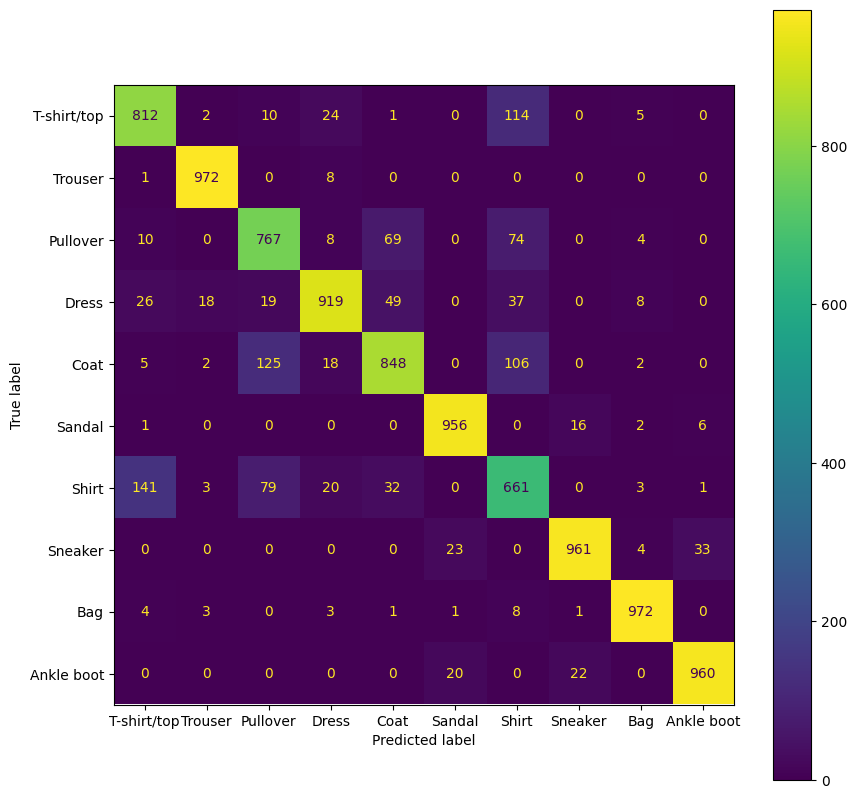

In [45]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
test_labels = np.array(f_test_label)

# Make predictions
y_probabilities = fashion_model.predict(f_test_data)

# Convert prediction probabilities into integers
y_predictions = y_probabilities.argmax(axis=1)

# Confusion matrix
cm=confusion_matrix(y_predictions,test_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)


## Classifying age of abalones.


In [46]:
print("<----->\nAbalone\n<----->")
abalone_data = pd.read_csv('abalones.csv',
                           names=['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight',
                                  'Shell Weight', 'Age'])
a_train_dataset = abalone_data.sample(frac=0.8, random_state=200)
a_test_dataset = abalone_data.drop(a_train_dataset.index)

a_train_data = a_train_dataset.copy()
a_train_label = a_train_data.pop('Age')
a_train_label = np.array(a_train_label)

a_test_data = a_test_dataset.copy()
a_test_label = a_test_data.pop('Age')
a_test_label = np.array(a_test_label)

normalize = tf.keras.layers.Normalization()
normalize.adapt(a_train_data)
normalize.adapt(a_test_data)

<----->
Abalone
<----->


2022-12-14 21:08:15.999928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 21:08:16.020714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [47]:
abalone_model = tf.keras.Sequential([normalize,
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(64, activation='relu'),
                                     tf.keras.layers.Dense(28, activation='softmax')
                                     ])
abalone_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
abalone_model.fit(a_train_data, a_train_label, epochs=10)
print(f"Models accuracy"
       f"\nBanknote: {round(banknote_model.evaluate(b_test_data, b_test_label)[1] * 100, 2)}%"
       f"\nCifar3: {round(cifar3_model.evaluate(cifar3_test_data, cifar3_test_label)[1] * 100, 2)}%"
       f"\nFashion: {round(fashion_model.evaluate(f_test_data, f_test_label)[1] * 100, 2)}%"
       f"\nAbalone: {round(abalone_model.evaluate(a_test_data, a_test_label)[1] * 100, 2)}%")

Epoch 1/10
 1/35 [..............................] - ETA: 9s - loss: 3.3322 - accuracy: 0.0000e+00

2022-12-14 21:08:16.614332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 15ms/step - loss: 3.3001 - accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 0s 7ms/step - loss: 3.2328 - accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 0s 7ms/step - loss: 3.1658 - accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 0s 6ms/step - loss: 3.0991 - accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 0s 9ms/step - loss: 3.0327 - accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 0s 6ms/step - loss: 2.9666 - accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 0s 6ms/step - loss: 2.9009 - accuracy: 0.0000e+00
Epoch 8/10
35/35 [==============================] - 0s 6ms/step - loss: 2.8356 - accuracy: 0.0000e+00
Epoch 9/10
35/35 [==============================] - 0s 6ms/step - loss: 2.7706 - accuracy: 0.0000e+00
Epoch 10/10
9/9 [==============================] - 0s 10ms/step - loss: 0.4994 - accuracy: 0

2022-12-14 21:08:19.527913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/94 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.8628

2022-12-14 21:08:19.786720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 33/313 [==>...........................] - ETA: 1s - loss: 0.3246 - accuracy: 0.8930

2022-12-14 21:08:20.552744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 11ms/step - loss: 2.6725 - accuracy: 0.0000e+00
Models accuracy
Banknote: 48.54%
Cifar3: 83.7%
Fashion: 88.28%
Abalone: 0.0%


2022-12-14 21:08:22.014172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
